In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
print(os.listdir("C:/Users/Catherine/projects/Capstone_Project_2/amazonalexareviews"))

['amazon_alexa.tsv']


In [2]:
df=pd.read_csv("C:/Users/Catherine/projects/Capstone_Project_2/amazonalexareviews/amazon_alexa.tsv",sep="\t",)
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


We have 2 Numeric Columns and 3 Object Variables including the Date Variable and a total of 3150 values. According to this, we do not have any NULL values in it. 

In [4]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


We see that there are no null values and that the data is very clean. The average rating 4.46, which is close to the maximum value. Most users have left positive reviews and are happy with their devices. 

Text(0, 0.5, 'Count')

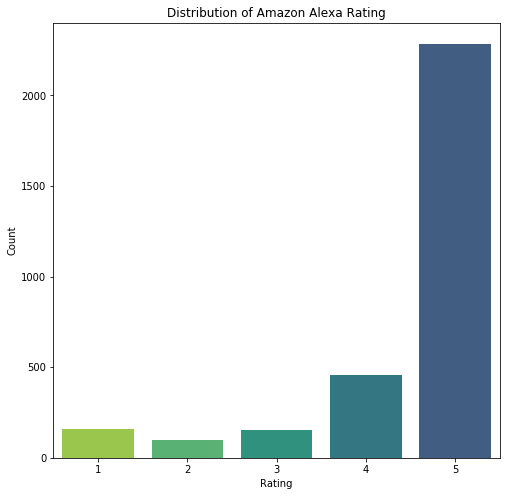

In [5]:
#Let's plot the countplot of the ratings

plt.figure(figsize=(8,8))
ax=sns.countplot(df['rating'],palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Distribution of Amazon Alexa Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Count")

In [6]:
variant_rating=df.groupby('variation')['rating'].mean().reset_index()
variant_rating.head()

,variation,rating
0,Black,4.233716
1,Black Dot,4.453488
2,Black Plus,4.370370
3,Black Show,4.490566
4,Black Spot,4.311203


Text(0, 0.5, 'Count')

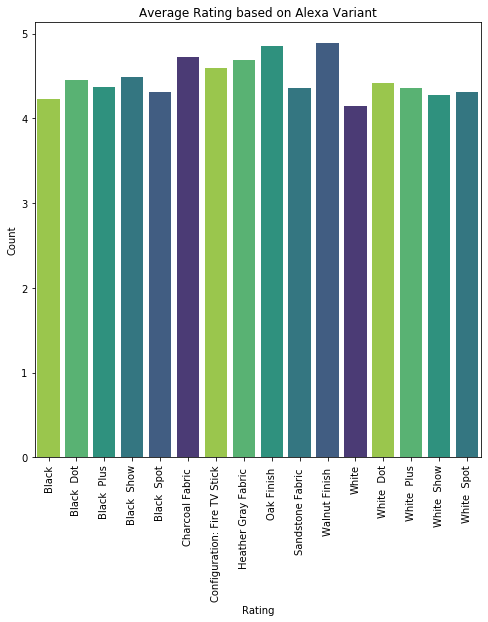

In [7]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x='variation',y='rating',data=variant_rating,palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Average Rating based on Alexa Variant")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("Rating")
ax.set_ylabel("Count")

Average rating of Alexa devices based on the different variants shows that average rating is more than 4 for each device. Charcoal Fabric and Walnut Finish have among the highest average ratings. 

### Top 3 Most Positive and Top 3 Most Negative Reviews

In [8]:
rating_review=df.sort_values(by='rating', ascending=False)
rating_review.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1600,5,29-Jul-18,Black Show,Love it. Thanks Amazon. You guys rock!!,1
1580,5,29-Jul-18,Black Show,"Works great, video call function nice when com...",1
1581,5,29-Jul-18,Black Show,,1
1582,5,29-Jul-18,Black Show,As you can see Echo Show is in kitchen. It far...,1


In [9]:
for i in rating_review['verified_reviews'].iloc[:6]:
    print(i, '\n')

Love my Echo! 

Love it. Thanks Amazon. You guys rock!! 

Works great, video call function nice when communicating through drop-in 

  

As you can see Echo Show is in kitchen. It far exceeds my expectation. There’s a wealth of information about any topic. If is customizable for sound and video. I also have Echo and Echo Dot. You can group them and have hole house music. Still not done exploring all it can do love it. Perfect for getting recipes so you can see them while you’re preparing to cook. 

Absolutely LOVE my Echo Show!  It is awesome and works great with my Ring Video Spotlight Cams!  Music on demand and so many more features that I have yet to explore!!! 



In [10]:
for i in rating_review['verified_reviews'].iloc[-6:]:
    print(i, '\n')

The tech isn’t there. It doesn’t understand most common words and is basically a glorified radio 

great product, but useless overall. Too many unnecessary features. Unless you have a smart home you don't need it 

  

So far not impressed at all. Does not save groups correctly can not understand me most of the time I'm not sure what the excitement is all about. Alexas voice sounds like it's under water how am I supposed to understand!!!!I'm going to return and try a google home!!! 

Very bad this device, I don’t know if it’s because is refurbished or what but it activated by itself , nobody is talking and he just activated and start talking. When you talk you have to yell super lauded 

The sound on these is terrible. It’s like a tin can. I love my echo but this item is awful. 



#### Looking at the Rating Column

In [11]:
# Percent of Each Rating
print('5 Star Rating Percent is {0} %'.format((2286/3150)*100))
print('4 Star Rating Percent is {0} %'.format((455/3150)*100))
print('3 Star Rating Percent is {0} %'.format((152/3150)*100))
print('2 Star Rating Percent is {0} %'.format((96/3150)*100))
print('1 Star Rating Percent is {0} %'.format((161/3150)*100))

5 Star Rating Percent is 72.57142857142857 %
4 Star Rating Percent is 14.444444444444443 %
3 Star Rating Percent is 4.825396825396826 %
2 Star Rating Percent is 3.0476190476190474 %
1 Star Rating Percent is 5.111111111111112 %


Most of the people gave a 5 star rating. Thus, the overall review of Amazon Alexa products are great. 

#### Let's make a new variable review_length to count the review length

In [12]:
df['review_length'] = df['verified_reviews'].apply(len)

In [13]:
df.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


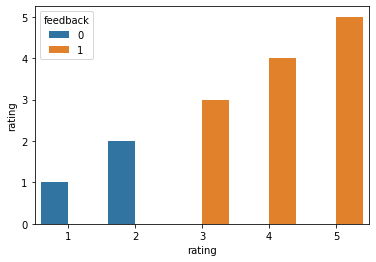

In [14]:
sns.barplot(x='rating', y='rating',hue='feedback', data=df)

Reviews that are 3 or above are classfied as 1 Feedback and any below 3 is considered 0 Feedback. It can also be understood that Above 3 is Positive Feedback and Below 3 is Negative Feedback.

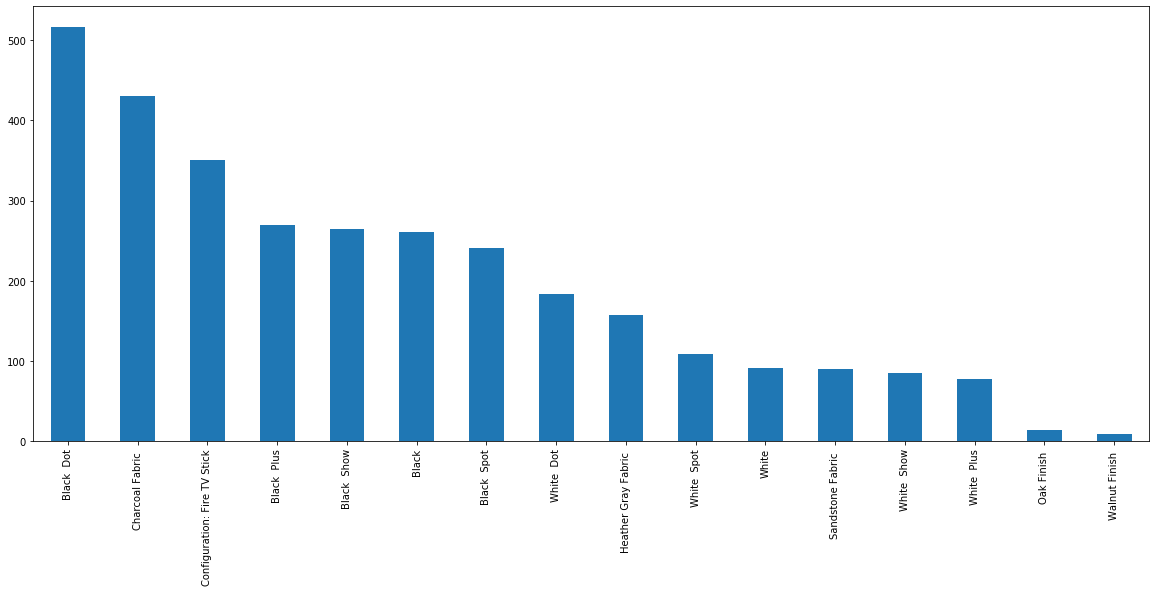

In [15]:
plt.figure(figsize= (20,8))
df.variation.value_counts().plot(kind='bar');

As we can see, the most widely used variations are Black Dot and Charcoal Fabric.

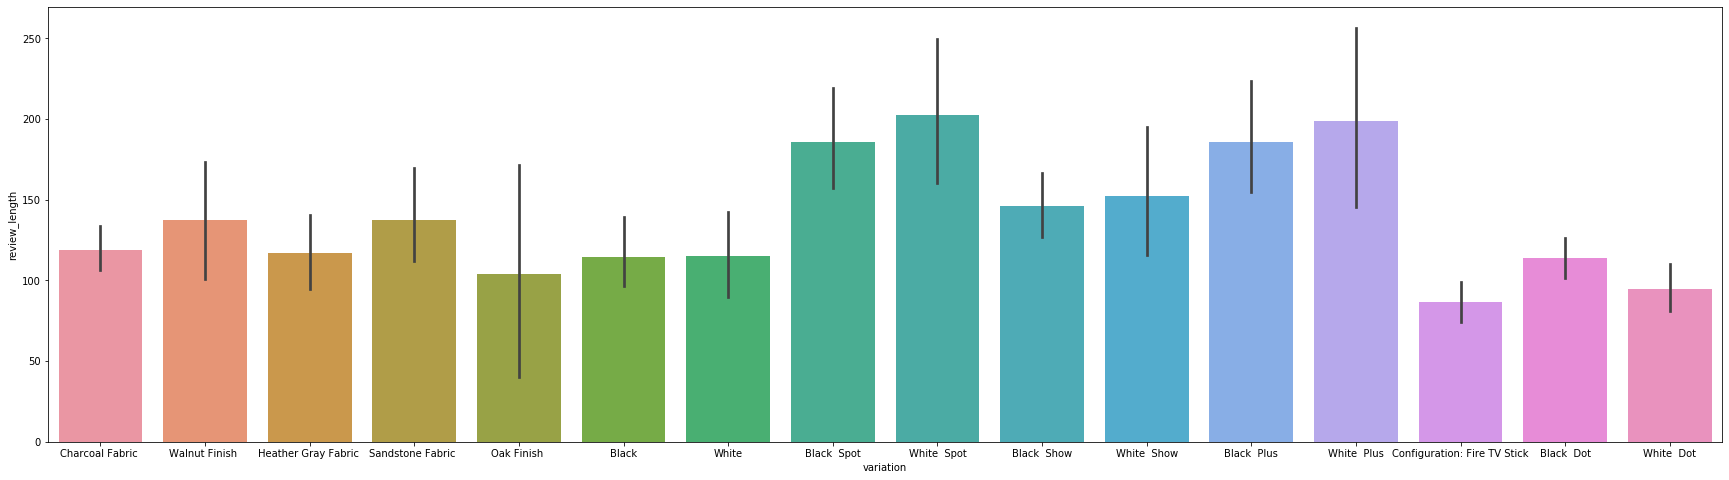

In [16]:
plt.figure(figsize= (30,8))
sns.barplot(x='variation',y='review_length',data=df);

Variation does not have any relation to review_length.

In [17]:
df.tail(25)

,rating,date,variation,verified_reviews,feedback,review_length
3125,4,30-Jul-18,Black Dot,This product is easy to use and very entertain...,1,125
3126,5,30-Jul-18,Black Dot,,1,1
3127,4,30-Jul-18,Black Dot,works great but speaker is not the good for mu...,1,88
3128,5,30-Jul-18,White Dot,Outstanding product - easy to use. works great,1,47
3129,4,30-Jul-18,White Dot,We have six of these throughout our home and t...,1,352
3130,5,30-Jul-18,Black Dot,Use the product for music and it’s great!,1,41
3131,5,30-Jul-18,Black Dot,Easy to set-up and to use.,1,26
3132,5,30-Jul-18,Black Dot,It works great!!,1,16
3133,4,30-Jul-18,White Dot,I like having more Alexa devices in my house a...,1,102
3134,5,30-Jul-18,Black Dot,PHENOMENAL,1,10


We have few NULL values or Empty Reviews in the verified_reviews column. The machine might have considered empty spaces as characters.

In [18]:
df.loc[(df.verified_reviews == ' '),]

,rating,date,variation,verified_reviews,feedback,review_length
85,5,30-Jul-18,Heather Gray Fabric,,1,1
183,3,29-Jul-18,Heather Gray Fabric,,1,1
219,5,29-Jul-18,Sandstone Fabric,,1,1
374,1,26-Jul-18,Black,,0,1
406,1,16-Jul-18,White,,0,1
...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,1
3120,5,30-Jul-18,Black Dot,,1,1
3123,4,30-Jul-18,Black Dot,,1,1
3126,5,30-Jul-18,Black Dot,,1,1


We have a total of 79 values which have Missing reviews.

In [19]:
df.review_length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: review_length, dtype: float64

In [20]:
pd.DataFrame(df.review_length.describe()).T

,count,mean,std,min,25%,50%,75%,max
review_length,3150.0,132.049524,182.099952,1.0,30.0,74.0,165.0,2851.0


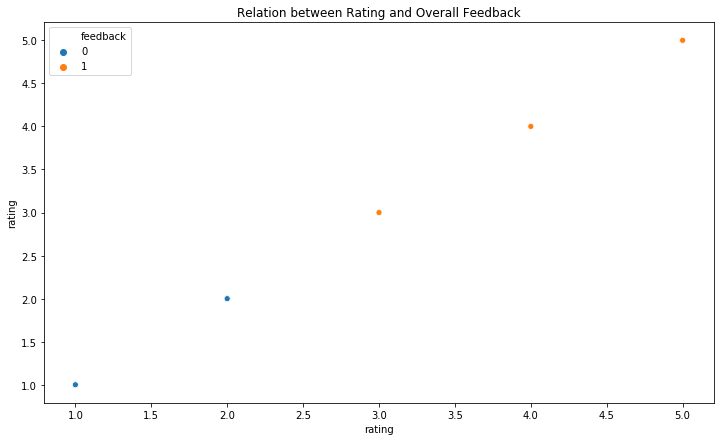

In [21]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x="rating", y="rating", hue="feedback",data=df)
plt.title("Relation between Rating and Overall Feedback");

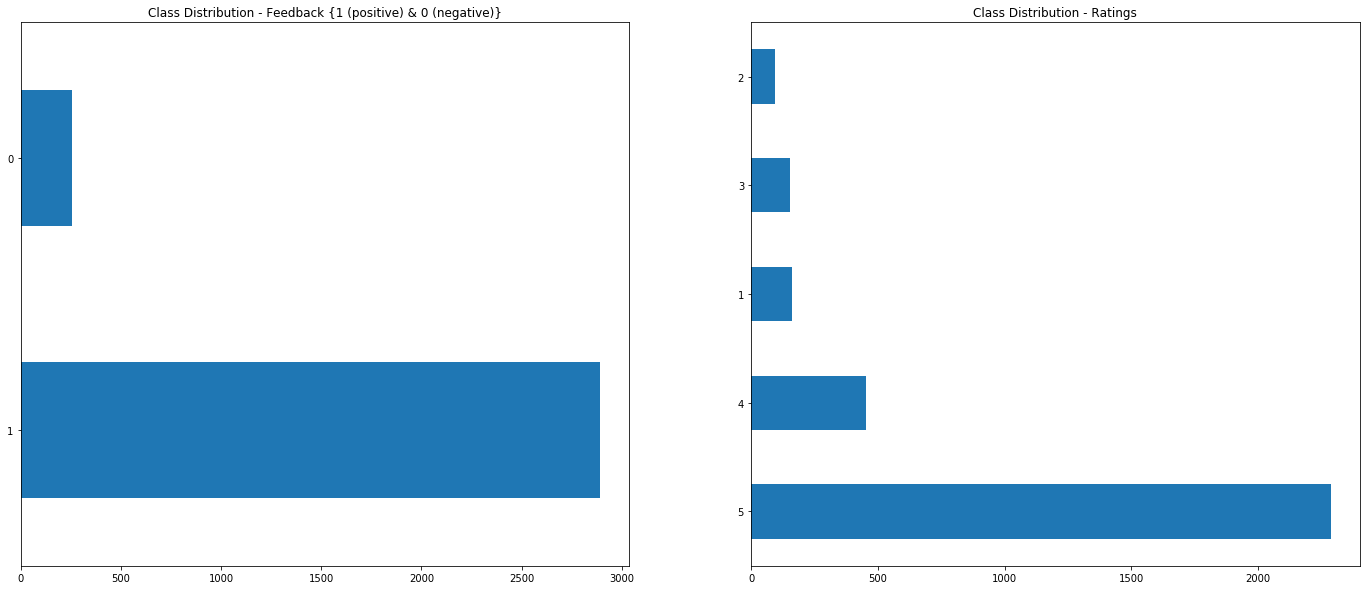

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(24, 10))

df.feedback.value_counts().plot.barh(ax=axs[0])
axs[0].set_title(("Class Distribution - Feedback {1 (positive) & 0 (negative)}"));

df.rating.value_counts().plot.barh(ax=axs[1])
axs[1].set_title("Class Distribution - Ratings");

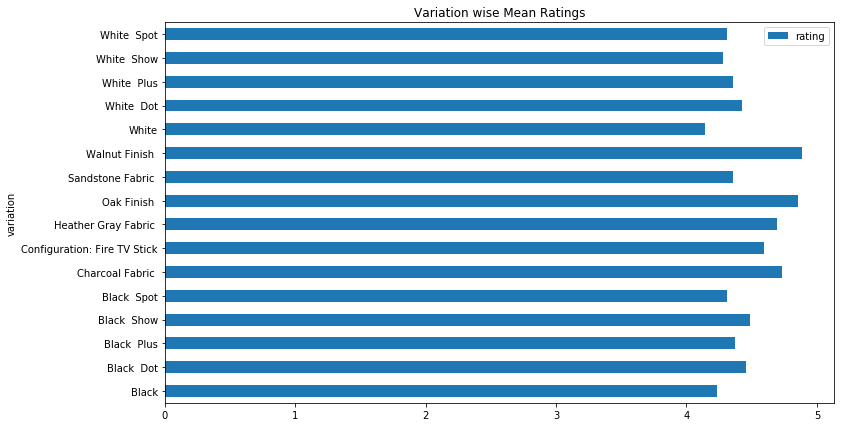

In [23]:
df.groupby('variation').mean()[['rating']].plot.barh(figsize=(12, 7))
plt.title("Variation wise Mean Ratings");

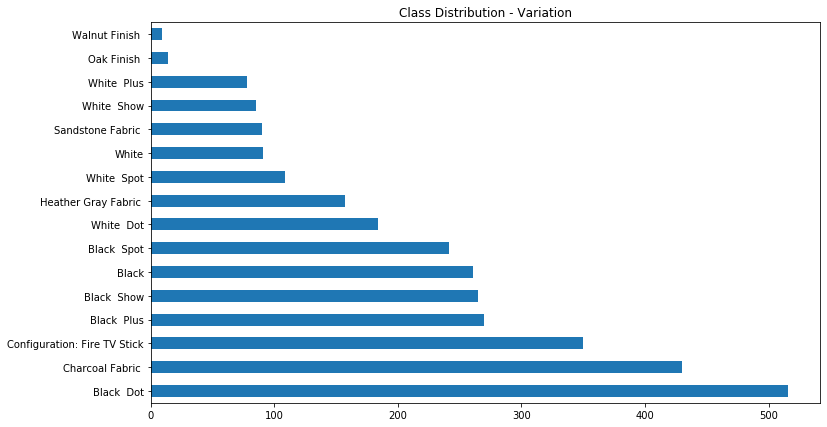

In [24]:
df.variation.value_counts().plot.barh(figsize=(12, 7))
plt.title("Class Distribution - Variation");